<a href="https://colab.research.google.com/github/Naveen9221/Coding/blob/main/pixel_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving simulation_data_640x480.txt to simulation_data_640x480 (1).txt


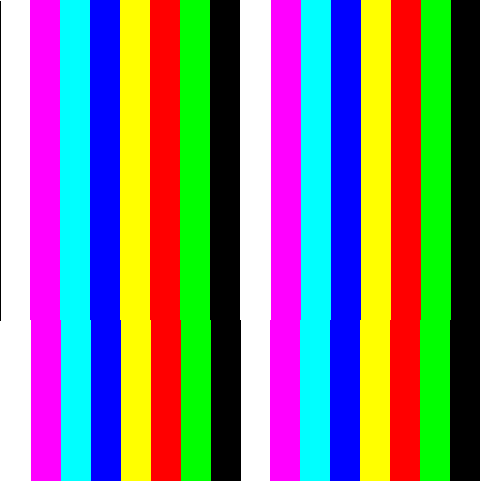

In [21]:
from google.colab import files
from PIL import Image
import numpy as np
from IPython.display import display

# Step 1: Upload the hex file
uploaded = files.upload()

# Step 2: Read and clean the hex string
filename = list(uploaded.keys())[0]
with open(filename, "r") as f:
    hex_data = f.read().replace('\n', '').replace(' ', '')

# Step 3: Convert hex to bytes
# Each pixel = 6 hex characters = 3 bytes (RGB888)
total_pixels = len(hex_data) // 6  # Ignore incomplete pixel at the end
hex_data = hex_data[:total_pixels * 6]  # Trim to full pixels only
pixel_bytes = bytes.fromhex(hex_data)

# Step 4: Set image width and compute height dynamically
width = 480
height = total_pixels // width  # Rows possible with 640 columns

# Trim extra pixels that don't fit full rows
valid_pixel_count = width * height
pixel_bytes = pixel_bytes[:valid_pixel_count * 3]

# Step 5: Create image array
img_array = np.frombuffer(pixel_bytes, dtype=np.uint8).reshape((height, width, 3))

# Step 6: Create and display image
img = Image.fromarray(img_array, 'RGB')
img.save('output.png')
display(img)
